In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal


/var/folders/7t/860dclk54774ltwycrvfp7nc0000gn/T/ipykernel_83641/3738229574.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_mu = pd.read_csv('VELO_LSC_calibrated_median_new.csv')
df_mu['TS'] = pd.to_datetime(df_mu['TS'])
df_mu = df_mu.set_index('TS')
df_mu = df_mu.between_time('13:31:15', '14:30')
df_sum_raw = pd.read_csv('minivdm_norm_sum_raw.csv')
df_sum_raw['TS'] = pd.to_datetime(df_sum_raw['TS'])
df_sum_raw = df_sum_raw.set_index('TS')
df_sum_raw = df_sum_raw.between_time('13:31:15', '14:30')
df_sum = pd.read_csv('minivdm_norm_sum_calib.csv')
df_sum['TS'] = pd.to_datetime(df_sum['TS'])
df_sum = df_sum.set_index('TS')
df_sum = df_sum.between_time('13:31:15', '14:30')
df_trim = pd.read_csv('minivdm_norm_trim_calib.csv')
df_trim['TS'] = pd.to_datetime(df_trim['TS'])
df_trim = df_trim.set_index('TS')
df_trim = df_trim.between_time('13:31:15', '14:30')
df_sep = pd.read_csv('minivdm_norm_sep.csv')
df_sep['TS'] = pd.to_datetime(df_sep['TS'])
df_sep = df_sep.set_index('TS')
df_sep = df_sep.between_time('13:31:15', '14:30')

In [11]:
x_mu_test = pd.read_csv('VeloAx_mu_test.csv')
x_sum_raw_test = pd.read_csv('VeloAx_sum_raw_test.csv')
x_sum_test = pd.read_csv('VeloAx_sum_test.csv')
x_trim_test = pd.read_csv('VeloAx_trim_test.csv')
x_sep_test = pd.read_csv('VeloAx_sep_test.csv')
x_mu_test['res'] = x_mu_test['VeloABeamPositionx']-x_mu_test['xVeloA']
x_sum_raw_test['res'] = x_sum_raw_test['VeloABeamPositionx']-x_sum_raw_test['xVeloA']
x_sum_test['res'] = x_sum_test['VeloABeamPositionx']-x_sum_test['xVeloA']
x_trim_test['res'] = x_trim_test['VeloABeamPositionx']-x_trim_test['xVeloA']
x_sep_test['res'] = x_sep_test['VeloABeamPositionx']-x_sep_test['xVeloA']

#taglia tutti i valori che stanno fuori dall'intervallo -0.1 e 0.1
x_mu_test = x_mu_test[(x_mu_test['res']>-0.05) & (x_mu_test['res']<0.05)]
x_sum_raw_test = x_sum_raw_test[(x_sum_raw_test['res']>-0.05) & (x_sum_raw_test['res']<0.05)]
x_sum_test = x_sum_test[(x_sum_test['res']>-0.05) & (x_sum_test['res']<0.05)]
x_trim_test = x_trim_test[(x_trim_test['res']>-0.05) & (x_trim_test['res']<0.05)]
x_sep_test = x_sep_test[(x_sep_test['res']>-0.05) & (x_sep_test['res']<0.05)]

In [12]:
#creami un vettore di bins che vada dal valore più piccolo di x fra i vari df di test e il valore più alto di x fra i vari df di test e sia grande 100
bins = np.linspace(min([x_mu_test['res'].min(), x_sum_raw_test['res'].min(), x_sum_test['res'].min(), x_trim_test['res'].min(), x_sep_test['res'].min()]), max([x_mu_test['res'].max(), x_sum_raw_test['res'].max(), x_sum_test['res'].max(), x_trim_test['res'].max(), x_sep_test['res'].max()]), 30)


"\nprint(df['1_comp_decouple_y'].mean())\nprint(df['1_comp_decouple_y'].std())\nprint(df_2['1_comp_decouple_y'].mean())\nprint(df_2['1_comp_decouple_y'].std())\n"

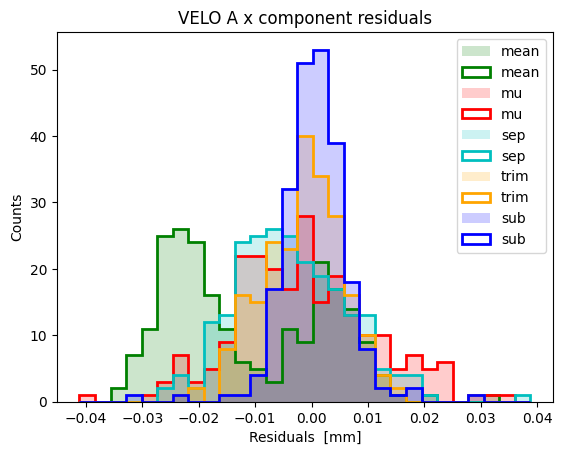

In [28]:
#riempimento a linee diagonali

x_sum_raw_test['res'].hist(alpha=.2,label='mean',bins=bins,histtype='stepfilled',linewidth=2,color='g')
x_sum_raw_test['res'].hist(alpha=1,label='mean',bins=bins,histtype='step',linewidth=2,color='g')
x_mu_test['res'].hist(alpha=0.2,label='mu',bins=bins,histtype='stepfilled',linewidth=2,color='r')
x_mu_test['res'].hist(alpha=1,label='mu',bins=bins,histtype='step',linewidth=2,color='r')
x_sep_test['res'].hist(alpha=.2,label='sep',bins=bins,histtype='stepfilled',linewidth=2,color='c')
x_sep_test['res'].hist(alpha=1,label='sep',bins=bins,histtype='step',linewidth=2,color='c')
x_trim_test['res'].hist(alpha=.2,label='trim',bins=bins,histtype='stepfilled',linewidth=2,color='orange')
x_trim_test['res'].hist(alpha=1,label='trim',bins=bins,histtype='step',linewidth=2,color='orange')
x_sum_test['res'].hist(alpha=.2,label='sub',bins=bins,histtype='stepfilled',linewidth=2,color='b')
x_sum_test['res'].hist(alpha=1,label='sub',bins=bins,histtype='step',linewidth=2,color='b')

'''
mu1=df['1_comp_decouple_y'].mean()
mu2=df_2['1_comp_decouple_y'].mean()
std1=df['1_comp_decouple_y'].std()
std2=df_2['1_comp_decouple_y'].std()

plt.text(-0.0003, 120, f'mu up:{Decimal(mu2):.2E}')
plt.text(-0.0003, 110, f'mu down:{Decimal(mu1):.2E}')
plt.text(-0.0003, 90, f'std up:{Decimal(std2):.2E}')
plt.text(-0.0003, 80, f'std down:{Decimal(std1):.2E}')
'''

#togli la griglia
plt.grid(False)


plt.xlabel('Residuals  [mm]')
plt.ylabel('Counts')
plt.title('VELO A x component residuals')
plt.legend()
'''
print(df['1_comp_decouple_y'].mean())
print(df['1_comp_decouple_y'].std())
print(df_2['1_comp_decouple_y'].mean())
print(df_2['1_comp_decouple_y'].std())
'''

In [10]:
print(df['1_comp_decouple_x'].mean())
print(df['1_comp_decouple_x'].std())
print(df_2['1_comp_decouple_x'].mean())
print(df_2['1_comp_decouple_x'].std())

-0.00010695193090939285
0.00012825212445928056
1.824561705463642e-05
2.023818969048574e-05
